In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from scipy.io import netcdf
from netCDF4 import num2date
from netCDF4 import Dataset as NetCDFFile 

from mpl_toolkits.basemap import Basemap

In [43]:
path='/home/garcia/Documents/PhD/DATA/'
mfiles=  'GOM025-GSL301.050_y1993-2012.1d_gridT.nc','GOM025-GSL301.001_y1993-2012.1d_gridT.nc'
mean_file=path+ mfiles[0]
print(mean_file)

/home/garcia/Documents/PhD/DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc


In [44]:
#mean_file = '/home/garcia/Documents/PhD/DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc'
ids=0
for item in mfiles:
    
    mean_file=path+ mfiles[ids]
    
    ds = xr.open_dataset(mean_file)
    print(ds.ssh.shape)
    ids=ids+1
    print(ids)
#ncf= NetCDFFile('/home/garcia/Documents/PhD/DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc')
#mean_file = ['DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc','DATA/GOM025-GSL301.001_y1993-2012.1d_gridT.nc']
#ds = xr.open_mfdataset(mean_file,chunks=None,concat_dim='ensemble')
#lats = xr.open_dataset(mean_file)['nav_lat']
#lons = xr.open_dataset(mean_file)['nav_lon']
#time = xr.open_dataset(mean_file)['time_counter']



(7300, 141, 201)
1
(7300, 141, 201)
2


In [3]:
#tvar=ncf.variables[('time_centered')][:]
#lats=ncf.variables[('nav_lat')][:]
#lons=ncf.variables[('nav_lon')][:]
#SSH=ncf.variables[('ssh')][:]
#SST=ncf.variables[('sst')][:]

In [3]:
from oocgcm.griddeddata import grids
#x = np.arange(start=0, stop=1.e7, step=1.e6,dtype=float)
#y = np.arange(start=0, stop=1.2e7, step=1.e6,dtype=float)
grd = grids.plane_2d_grid(ycoord=ds.nav_lat,xcoord=ds.nav_lon)

In [4]:
gssh=grd.norm_of_vectorfield(grd.horizontal_gradient(ds.ssh))
print(gssh.shape)
print(ds.ssh.shape)

(7300, 141, 201)
(7300, 141, 201)


In [5]:

mla=88
mlo=45
print(lats[mla,mlo],lons[mla,mlo])
print(ds.ssh[:,mla,mlo].shape)


(<xarray.DataArray 'nav_lat' ()>
array(24.91258430480957, dtype=float32)
Coordinates:
    nav_lat  float32 24.9126
    nav_lon  float32 -87.0003
    y        int64 88
    x        int64 45
Attributes:
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T, <xarray.DataArray 'nav_lon' ()>
array(-87.00030517578125, dtype=float32)
Coordinates:
    nav_lat  float32 24.9126
    nav_lon  float32 -87.0003
    y        int64 88
    x        int64 45
Attributes:
    axis: X
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T)
(7300,)


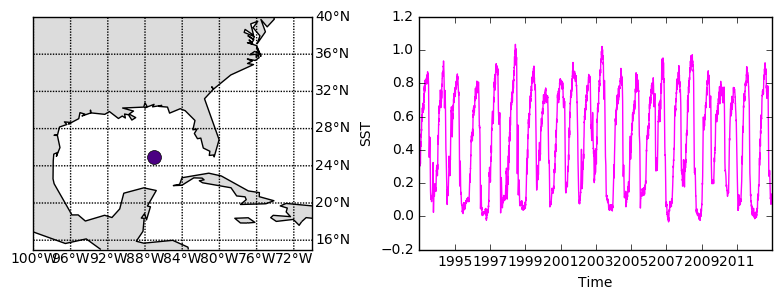

In [78]:
#def plot_example(variable,mlo,mla)

fig=plt.figure(figsize=(10.0,3.0))
axes1=fig.add_subplot(1,2,1)
llcrnrlon = -100
llcrnrlat = 15
urcrnrlon = -70
urcrnrlat = 40
proj='cyl'
m = Basemap(llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
                urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
                projection=proj)
m.fillcontinents(color='darkseagreen')

my, mx =m(lats[mla,mlo],lons[mla,mlo])
#mx,my= m(24,-85)
dst=1
parallels = np.arange(-100.,81.,4.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(0.,351.,4.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawcoastlines()
m.plot(mx,my,color='indigo',marker='o',markersize=6)
#fig=plt.figure(figsize=(10.0,3.0))
#fig2=plt.figure(figsize=(10.0,3.0))

axes2=fig.add_subplot(1,2,2)
axes2.set_ylabel('SST')
axes2.set_xlabel('Time')
colorgr=(1,0,1)
axes2.plot(time,ds.sst[:,mla,mlo],color=colorgr,linestyle='solid')
#axes1.plot(shla[:,-1],'or')
plt.show()
fig.savefig('test%s.pdf' %dst)

#plt.gcf().clear()

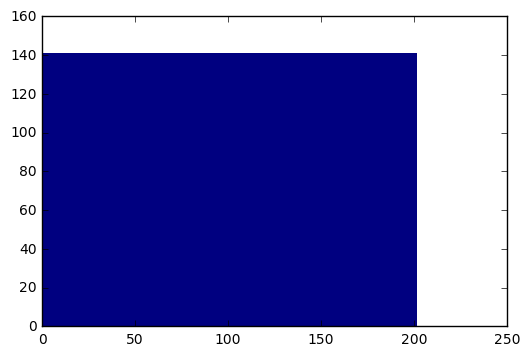

(141, 201)


In [12]:
#fig=plt.figure(figsize=(10.0,3.0))
#axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)
axes1.set_ylabel('SST')
axes1.set_xlabel('Time')
plt.pcolormesh(ds.ssh[100,:,:])
#axes1.plot(shla[:,-1],'or')
plt.show()
print(ds.ssh[100,:,:].shape)
#fig.savefig('test%s.pdf' %dst)